In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("stats_.xlsx")

In [ ]:
data.head()
print(data.columns)

Index(['Permanent address', 'distance from residence', 'Unnamed: 2', 'Age',
       'Gender', 'Direction of college', 'Distance from college',
       'Institution / Organization', 'private college or public', 'Category',
       'Duration of stay (check the form description for check in and check out timings)'],
      dtype='object')


In [ ]:
data.describe()

,distance from residence,Age,Gender,Distance from college
count,158.000000,158.000000,158.000000,151.000000
mean,371.158228,19.208861,0.525316,343.917881
std,312.991164,2.644677,0.500946,341.738894
min,8.000000,14.000000,0.000000,8.000000
25%,60.000000,18.000000,0.000000,49.000000
50%,350.000000,19.000000,1.000000,270.000000
75%,618.750000,20.000000,1.000000,600.000000
max,1954.000000,40.000000,1.000000,1822.000000


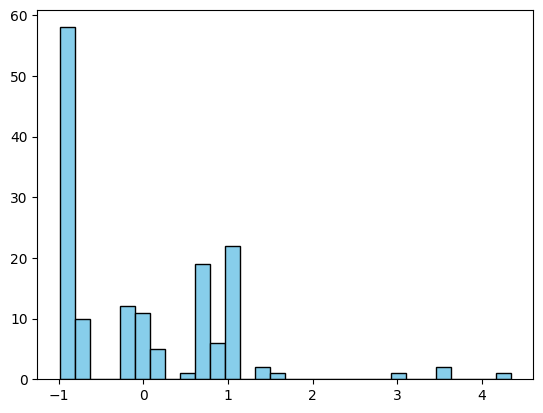

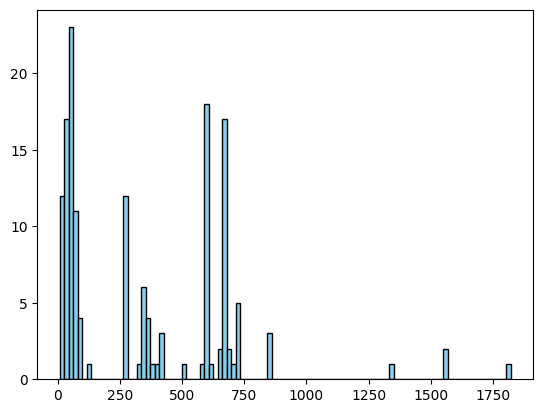

In [ ]:
normalized_data = (data["Distance from college"]- np.mean(data["Distance from college"])) / np.std(data["Distance from college"])

# Plot the normalized data
plt.hist(normalized_data, bins=30, color='skyblue', edgecolor='black')
plt.show()
plt.hist(data["Distance from college"], bins=100, color='skyblue', edgecolor='black')
# Show plot
plt.show()

In [ ]:
one_hot_encoded = pd.get_dummies(data['Duration of stay (check the form description for check in and check out timings)'])

data = pd.concat([data, one_hot_encoded], axis=1)

In [ ]:
data.head()

,Permanent address,distance from residence,Unnamed: 2,Age,Gender,Direction of college,Distance from college,Institution / Organization,private college or public,Category,Duration of stay (check the form description for check in and check out timings),"15th, 16th and 17th March",16th and 17th March
0,"c-301,majestic height, shivaji nagar,ram nagar...",502.0,se,18,1,se,56.0,VARDHAMAN COLLEGE OF ENGINEERING,Private,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March",True,False
1,"20-98/1, Mogarala, Pakala, Tirupati, 517152",584.0,s,20,0,s,593.0,Sri Venkateswara University College of Enginee...,Public,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March",True,False
2,"Hno:26-12-551, near B.V.nagar, Nellore, Andhra...",530.0,s,20,0,s,593.0,Sri Venkateswara University College of Enginee...,Public,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March",True,False
3,"Hno:26-12-551,near B.V.nagar, Nellore",530.0,se,19,1,se,56.0,Vardhaman College of Engineering,Private,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March",True,False
4,Sri Nagar Colony Vaikuntapuram Tirupati 517502,599.0,s,19,0,s,593.0,Sri Venkateshwara University College of Engine...,Public,Participant (in either of Workshops / Techy ev...,"15th, 16th and 17th March",True,False


In [ ]:
'''plt.figure(figsize=(8, 6))
plt.scatter(data['15th, 16th and 17th March'],
            data['Distance from college'],
            color='skyblue',
            edgecolor='black')
plt.title('Distance from College vs. Duration of Stay')
plt.xlabel('Duration of Stay')
plt.ylabel('Distance from College')
plt.grid(True)
plt.show()'''

"plt.figure(figsize=(8, 6))\nplt.scatter(data['15th, 16th and 17th March'],\n            data['Distance from college'],\n            color='skyblue',\n            edgecolor='black')\nplt.title('Distance from College vs. Duration of Stay')\nplt.xlabel('Duration of Stay')\nplt.ylabel('Distance from College')\nplt.grid(True)\nplt.show()"

In [ ]:
distances_2day = np.array(data.loc[data['Duration of stay (check the form description for check in and check out timings)'] == '16th and 17th March', 'distance from residence'])
distances_3day = np.array(data.loc[data['Duration of stay (check the form description for check in and check out timings)'] == '15th, 16th and 17th March', 'distance from residence'])
print(distances_3day.shape)
print(distances_2day.shape)

(86,)
(72,)


In [ ]:
def gaussian(x, mean, variance):
    pdf = (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean)**2) / (2 * variance))
    return pdf

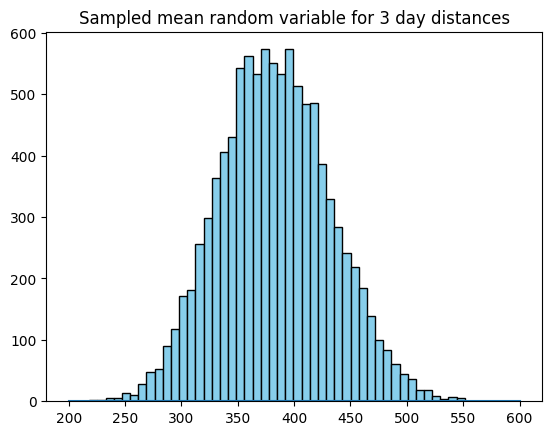

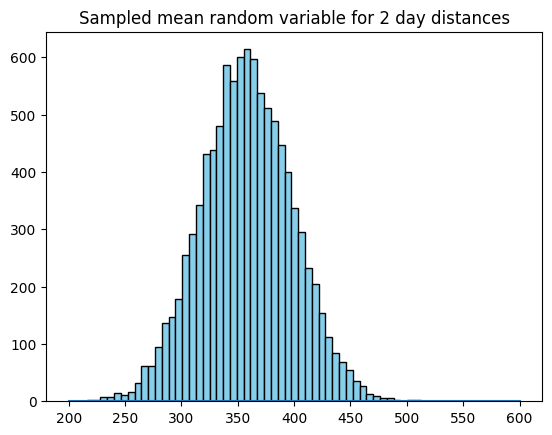

<ipython-input-27-0d17e5e64d75>:58: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


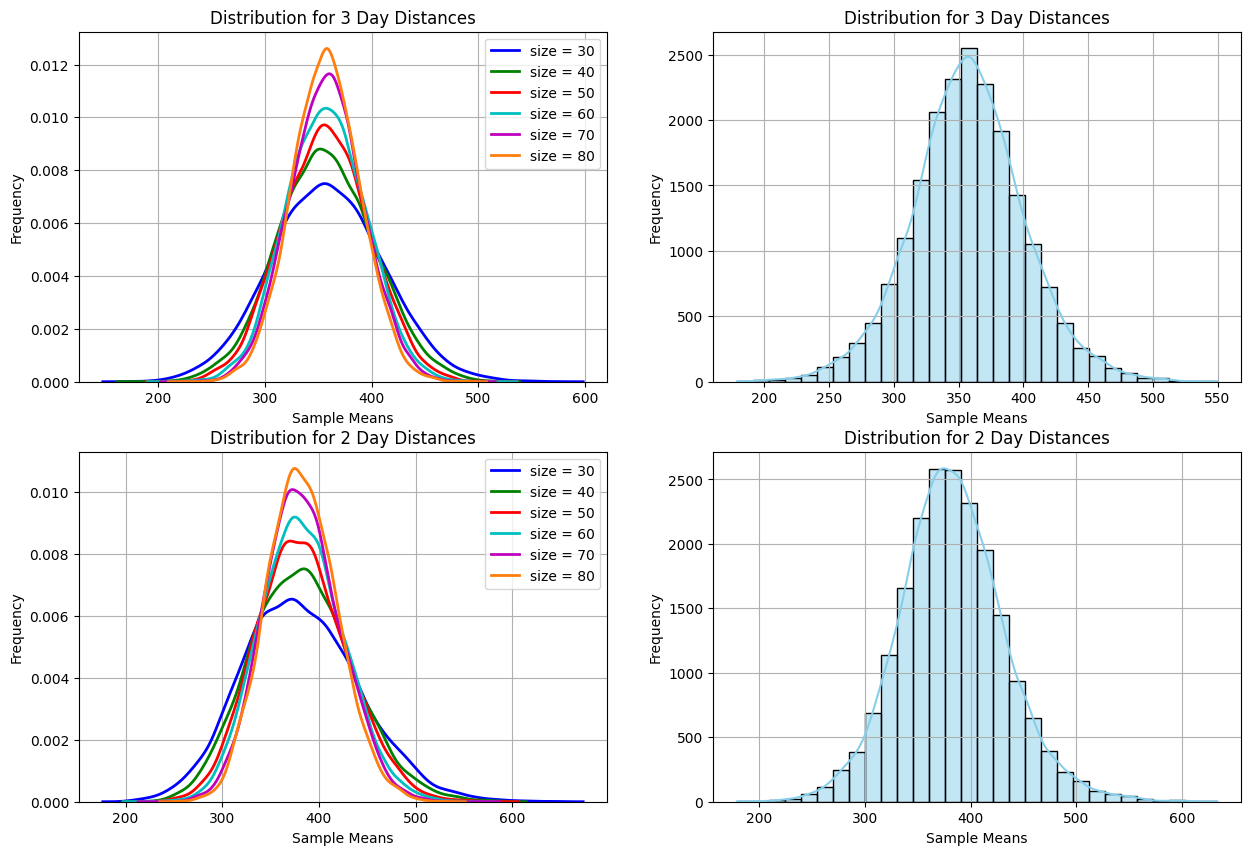

In [ ]:
# Visualizing CLT, fitting a normal using a MLE estimate on the obtained data

n1 = 30
n2 = 30

X1_values = []
X2_values = []
for i in range(10000):
    X1 = np.random.choice(distances_3day, size=n1, replace=False)
    X2 = np.random.choice(distances_2day, size=n2, replace=False)
    X1_values.append(np.mean(X1))
    X2_values.append(np.mean(X2))


x = np.linspace(200, 600, 1000)
mean_mle = np.mean(X1_values)
variance_mle = np.var(X1_values)

plt.plot(x, gaussian(x, mean_mle, variance_mle), label='Gaussian Estimate of the given samples')
plt.hist(X1_values, bins=50, color='skyblue', edgecolor='black')
plt.title("Sampled mean random variable for 3 day distances")
plt.show()

################################################################################


x = np.linspace(200, 600, 1000)
mean_mle = np.mean(X2_values)
variance_mle = np.var(X2_values)

plt.plot(x, gaussian(x, mean_mle, variance_mle), label='Gaussian Estimate of the given samples')
plt.hist(X2_values, bins=50, color='skyblue', edgecolor='black')
plt.title("Sampled mean random variable for 2 day distances")
plt.show()

#

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example dataset: Adjust this to use your own data
# You can use any data source (CSV, Excel, database, etc.)
# Example: Generate 10,000 data points from a uniform distribution between 0 and 100
data_cpy = distances_2day

# Number of samples and sample size
num_samples = 10000
sample_size = 100

# Generate sample means
sample_sizes = [30, 40, 50, 60, 70, 80]
colors = ['b', 'g', 'r', 'c', 'm', 'tab:orange']
sample_means = []

plt.subplots(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.grid()
for i in range(len(sample_sizes)):
    sample_size = sample_sizes[i]
    sample_means = []
    for j in range(num_samples):
      sample = np.random.choice(data_cpy, sample_size)  # Randomly draw a sample
      sample_means.append(np.mean(sample))  # Calculate the mean of the sample
    sns.kdeplot(sample_means, color=colors[i], linewidth=2, label = f'size = {sample_size}')

plt.title('Distribution for 3 Day Distances')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 2)
plt.grid()
# Plot the distribution of the sample means
for j in range(num_samples):
    sample = np.random.choice(data_cpy, 30)  # Randomly draw a sample
    sample_means.append(np.mean(sample))  # Calculate the mean of the sample
sns.histplot(sample_means, kde=True, color='skyblue', bins=30)

plt.title('Distribution for 3 Day Distances')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')

data_cpy = distances_3day

# Number of samples and sample size
num_samples = 10000
sample_size = 100

# Generate sample means
sample_sizes = [30, 40, 50, 60, 70, 80]
colors = ['b', 'g', 'r', 'c', 'm', 'tab:orange']
sample_means = []

plt.subplot(2, 2, 3)
plt.grid()
for i in range(len(sample_sizes)):
    sample_size = sample_sizes[i]
    sample_means = []
    for j in range(num_samples):
      sample = np.random.choice(data_cpy, sample_size)  # Randomly draw a sample
      sample_means.append(np.mean(sample))  # Calculate the mean of the sample
    sns.kdeplot(sample_means, color=colors[i], linewidth=2, label = f'size = {sample_size}')

plt.title('Distribution for 2 Day Distances')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(2, 2, 4)
plt.grid()
# Plot the distribution of the sample means
for j in range(num_samples):
    sample = np.random.choice(data_cpy, 30)  # Randomly draw a sample
    sample_means.append(np.mean(sample))  # Calculate the mean of the sample
sns.histplot(sample_means, kde=True, color='skyblue', bins=30)

plt.title('Distribution for 2 Day Distances')
plt.xlabel('Sample Means')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Sample the data

n1 = 30
n2 = 30

X1 = np.random.choice(distances_3day, size=n1, replace=False)
X1_mean = np.mean(X1)
X1_std = np.std(X1)

X2 = np.random.choice(distances_2day, size=n2, replace=False)
X2_mean = np.mean(X2)
X2_std = np.std(X2)

X1_np = np.array(X1)
X2_np = np.array(X2)
X1_np = np.reshape(X1_np, (X1_np.shape[0], 1))
X2_np = np.reshape(X2_np, (X2_np.shape[0], 1))
data = np.hstack((X1_np, X2_np))
print(data.shape)

df = pd.DataFrame(data, columns=['3 Day Distances', '2 Day Distances'])

# Checking if the standard deviations may be the same
print(X2_std/X1_std)

(30, 2)
0.7212260149836633


In [ ]:
# Describing the sample

df.describe()

,3 Day Distances,2 Day Distances
count,30.000000,30.000000
mean,460.980000,311.690000
std,370.448375,267.177005
min,28.000000,34.000000
25%,277.750000,56.000000
50%,399.000000,266.500000
75%,605.000000,544.250000
max,1954.000000,837.000000


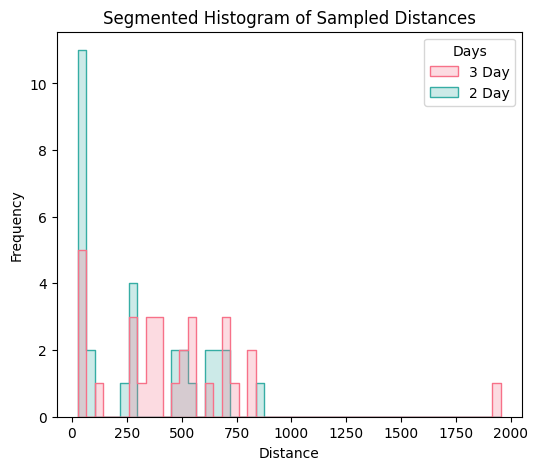

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for seaborn
import pandas as pd
df = pd.DataFrame({
    'Distances': np.concatenate([X1, X2]),
    'Days': ['3 Day'] * len(X1) + ['2 Day'] * len(X2)
})

# Create segmented histograms using seaborn
plt.figure(figsize=(6, 5))
sns.histplot(data=df, x='Distances', bins=50, hue='Days', element='step', palette='husl', legend = True)
plt.title('Segmented Histogram of Sampled Distances')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
from scipy.stats import t

def calculate_t_critical(df, alpha):
    """
    Calculate the critical value for a t-distribution with given degrees of freedom
    and confidence interval.

    Parameters:
        df: int, degrees of freedom
        confidence: float, confidence interval (between 0 and 1)

    Returns:
        float: t-critical value
    """
    t_critical = t.ppf(1 - alpha, df)
    return t_critical

def t_distribution_cdf(x, df):
    """
    Calculate the Cumulative Distribution Function (CDF) for the t-distribution.

    Parameters:
        x: float or array_like, quantiles
        df: int, degrees of freedom

    Returns:
        float or ndarray, CDF values
    """
    return t.cdf(x, df)

def plot_t_distribution_rejection_region(df, alpha, t_s):
    """
    Plot the t-distribution with the rejection region shaded for hypothesis testing.

    Parameters:
        df: int, degrees of freedom
        confidence: float, confidence interval (between 0 and 1)
    """
    # Define the range of x values
    x = np.linspace(-4, 4, 1000)

    # Calculate t-critical values
    t_critical = calculate_t_critical(df, alpha)

    # Plot the t-distribution
    plt.figure(figsize=(8, 5))
    plt.plot(x, t.pdf(x, df), 'b-', label='t-distribution PDF')

    # Shade the rejection region
    x_fill = np.linspace(t_critical, 4, 100)
    plt.fill_between(x_fill, t.pdf(x_fill, df), color='red', alpha=0.5, label='Rejection Region')

    # Add vertical line at t-critical
    plt.axvline(x=t_critical, color='green', linestyle='--', label=f't-critical: {t_critical:.2f}')
    plt.axvline(x=t_s, color='black', linestyle='--', label=f't-sample: {t_s:.2f}')

    # Add labels and title
    plt.xlabel('t-value')
    plt.ylabel('Density')
    plt.title('t-Distribution with Rejection Region')
    plt.legend()
    plt.grid(True)
    plt.show()


52
460.97999999999996
311.69
1.820872911198084
1.6746891532047905
RESULT FROM REJECTION REGION TEST
There is sufficient evidence to reject the null hypothesis. The null hypothesis is rejected. Hence we can conclude that people who stay for 3 days come from further on average


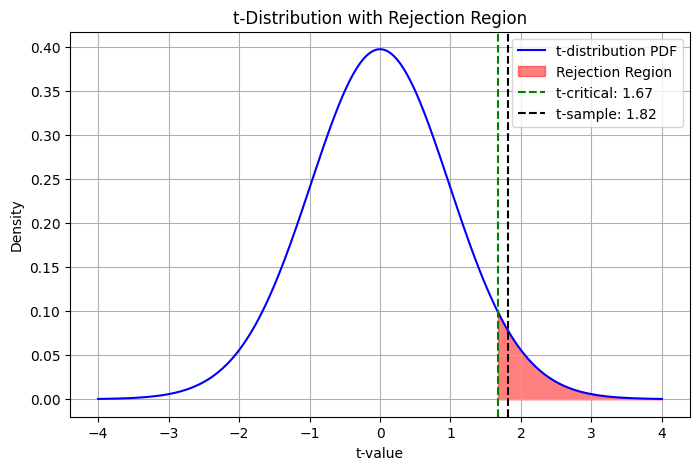

0.03719107012742884
0.05
RESULT FROM P-VALUE TEST
There is sufficient evidence to reject the null hypothesis. The null hypothesis is rejected. Hence we can conclude that people who stay for 3 days come from further on average


In [ ]:
# Assuming different variances

# Printout the values and make it similar to her slides in the hypothesis test in our presentation

alpha = 0.05

dof = int((X1_std**2 / n1 + X2_std**2 / n2)**2 / ( (X1_std**2 / n1)**2/(n1-1) + (X2_std**2 / n2)**2/(n2-1) ))

t_alpha = calculate_t_critical(dof, alpha)

t_ = (X1_mean - X2_mean) / ((X1_std**2 / n1) + (X2_std**2 / n2))**0.5

# Rejection Region Test

print(dof)
print(X1_mean)
print(X2_mean)
print(t_)
print(t_alpha)

print("RESULT FROM REJECTION REGION TEST")
if t_ >= t_alpha:
    print("There is sufficient evidence to reject the null hypothesis. The null hypothesis is rejected. Hence we can conclude that people who stay for 3 days come from further on average")
else:
    print("There is not sufficient evidence to reject the null hypothesis. The null hypothesis can't be rejected. Hence we can't conclude that people who stay for 3 days come from further on average")

# Plot the rejection Region and the value of t_ on the normal t distribution curve

plot_t_distribution_rejection_region(dof, alpha, t_)

# p-value test

p_value = 1 - t_distribution_cdf(t_, dof)

print(p_value)
print(alpha)

print("RESULT FROM P-VALUE TEST")
if p_value < alpha:
    print("There is sufficient evidence to reject the null hypothesis. The null hypothesis is rejected. Hence we can conclude that people who stay for 3 days come from further on average")
else:
    print("There is not sufficient evidence to reject the null hypothesis. The null hypothesis can't be rejected. Hence we can't conclude that people who stay for 3 days come from further on average")

RESULT FROM REJECTION REGION TEST
There is not sufficient evidence to reject the null hypothesis. The null hypothesis can't be rejected. Hence we can't conclude that people who stay for 3 days come from further on average


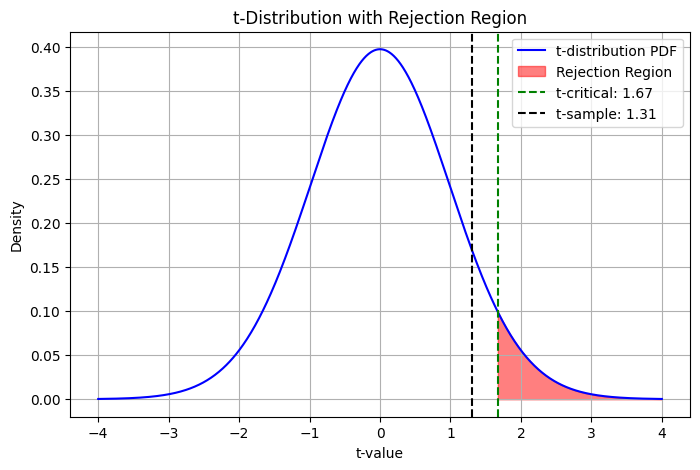

RESULT FROM P-VALUE TEST
There is not sufficient evidence to reject the null hypothesis. The null hypothesis can't be rejected. Hence we can't conclude that people who stay for 3 days come from further on average


In [ ]:
# Assuming same variances

alpha = 0.05

S_p = (((n1-1) * X1_std**2 + (n2-1) * X2_std**2) / n1 + n2 - 2)**0.5

dof = n1 + n2 - 2

t_alpha = calculate_t_critical(dof, alpha)

t_ = (X1_mean - X2_mean) / S_p / ((1 / n1) + (1 / n2))**0.5

# Rejection Region Test

print("RESULT FROM REJECTION REGION TEST")

# print(dof)
# print(X1_mean)
# print(X2_mean)
# print(t_)
# print(t_alpha)

if t_ >= t_alpha:
    print("There is sufficient evidence to reject the null hypothesis. The null hypothesis is rejected. Hence we can conclude that people who stay for 3 days come from further on average")
else:
    print("There is not sufficient evidence to reject the null hypothesis. The null hypothesis can't be rejected. Hence we can't conclude that people who stay for 3 days come from further on average")

# Plot the rejection Region and the value of t_ on the normal t distribution curve

plot_t_distribution_rejection_region(dof, alpha, t_)

# p-value test

p_value = 1 - t_distribution_cdf(t_, dof)

print("RESULT FROM P-VALUE TEST")

# print(p_value)
# print(alpha)

if p_value < alpha:
    print("There is sufficient evidence to reject the null hypothesis. The null hypothesis is rejected. Hence we can conclude that people who stay for 3 days come from further on average")
else:
    print("There is not sufficient evidence to reject the null hypothesis. The null hypothesis can't be rejected. Hence we can't conclude that people who stay for 3 days come from further on average")
